<a href="https://colab.research.google.com/github/shamreen20/Learn-NLP/blob/master/Copy_of_spam_classifier_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [ ]:
import pandas as pd
import re
import nltk

In [ ]:
import os

In [ ]:
import io

In [ ]:
messages = pd.read_csv('C:\\Users\\Rafiun Nesha\\Desktop\\SMSSpamCollection', sep='\t')

FileNotFoundError: ignored

#upload excel to google colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [ ]:
df2 = pd.read_csv("SMSSpamCollection",error_bad_lines=False, sep='\t', names = ['label','message'])

In [ ]:
df2.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


download stopwords from nltk  

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()

Make corpus empty, further it receive all the message data fron csv file information

In [ ]:
corpus = []

# Text cleaning

In [ ]:
for i in range(0,len(df2)):
  review = re.sub('[^a-zA-Z]','',df2['message'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ''.join(review)
  corpus.append(review)

countVectorizer(Bag of Words) is use for changing word to integer 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(corpus).toarray()

Make label column to dummies variable, Dummies is from pandas library
dummies change the word into binary form i.e. 0 and 1

In [ ]:
y = pd.get_dummies(df2['label'])

In [ ]:
y = y.iloc[:,1].values

# spliting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Training the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model = MultinomialNB().fit(X_train,y_train)

#Make Predictions

In [ ]:
y_pred = spam_detect_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

#Model Score

In [ ]:
spam_detect_model.score(X,y)

0.8693467336683417

See where your model is laging

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_m = confusion_matrix(y_test,y_pred)

In [ ]:
confusion_m

array([[1451,    0],
       [ 216,    5]])

SEE the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
accuracy

0.8708133971291866

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt

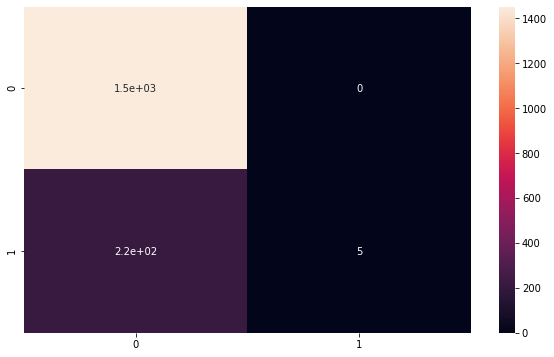

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)